## Importing Required Libraries
We start by importing the essential libraries:
- **NumPy**: for numerical computations and handling arrays.  
- **Pandas**: for loading and manipulating structured datasets.  
- **Matplotlib**: for data visualization and plotting.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Dataset
The MNIST handwritten digit dataset is loaded using Pandas.  
- Each row represents one image.  
- The first column contains the digit label (0–9).  
- The remaining columns store the pixel values of the 28×28 image (flattened into 784 values).

In [22]:
data = pd.read_csv('./Datasets/train.csv')

## Preprocessing the Data
Steps performed here:
1. Convert the Pandas DataFrame into a NumPy array for efficient computation.  
2. Shuffle the dataset to remove ordering bias.  
3. Split the dataset into:
   - **Development set (1000 samples)** → used for quick validation/testing.  
   - **Training set (remaining samples)** → used to train the neural network.  
4. Separate features (`X`) and labels (`Y`), and transpose for easier handling in matrix operations.

In [23]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [24]:
X_train[:, 0].shape

(784,)

## Defining the Neural Network Functions
Here we define the essential building blocks of a simple **2-layer neural network**:

- **init_params()** → Initializes weights and biases randomly for each layer.  
- **ReLU()** → Activation function for hidden layer, introduces non-linearity.  
- **softMax()** → Converts raw scores into probability distributions for classification.  
- **forward_prop()** → Performs forward propagation (input → hidden → output).  
- **one_hot()** → Converts labels into one-hot encoded format for multi-class classification.  
- **deriv_ReLU()** → Derivative of ReLU, needed for backpropagation.  
- **backward_prop()** → Calculates gradients of loss w.r.t parameters.  
- **update_params()** → Updates weights and biases using gradient descent.

In [25]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## Training the Neural Network
Now we implement the main training loop with **gradient descent**:
- **get_predictions()** → Returns the predicted class for each input.  
- **get_accuracy()** → Calculates accuracy by comparing predictions with true labels.  
- **gradient_descent()** →  
  - Initializes parameters.  
  - Repeatedly performs forward + backward propagation.  
  - Updates parameters using gradients.  
  - Prints accuracy at intervals to track training progress.  


In [26]:


def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


## Running Gradient Descent
We now train the neural network on the MNIST training data:  
- Learning rate (**alpha**) = 0.01  
- Iterations = 500  

The network will gradually improve accuracy with each iteration.

In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 7 5 ... 7 5 6] [0 8 2 ... 6 4 3]
0.09041463414634146
Iteration:  10
[0 8 5 ... 8 5 3] [0 8 2 ... 6 4 3]
0.2045121951219512
Iteration:  20
[0 8 3 ... 8 5 3] [0 8 2 ... 6 4 3]
0.3384390243902439
Iteration:  30
[0 8 0 ... 8 5 3] [0 8 2 ... 6 4 3]
0.4369512195121951
Iteration:  40
[0 6 0 ... 8 5 3] [0 8 2 ... 6 4 3]
0.5222926829268293
Iteration:  50
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.5886829268292683
Iteration:  60
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.6329268292682927
Iteration:  70
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.6639756097560976
Iteration:  80
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.6881463414634146
Iteration:  90
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.707
Iteration:  100
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.7250243902439024
Iteration:  110
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.7388536585365854
Iteration:  120
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.7504146341463415
Iteration:  130
[0 6 0 ... 6 5 3] [0 8 2 ... 6 4 3]
0.7609756097560976
Iteration:  140
[0 6 0 ... 6 

In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


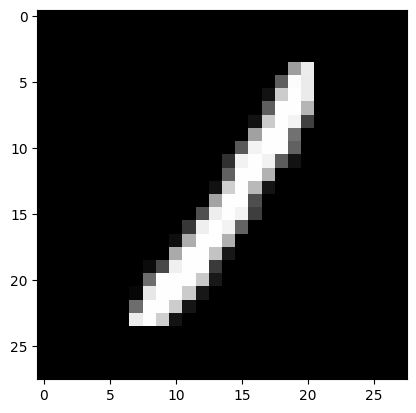

Prediction:  [6]
Label:  6


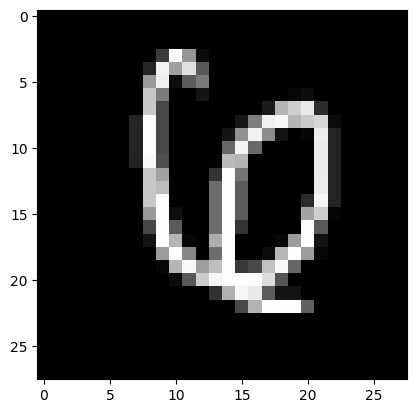

Prediction:  [8]
Label:  8


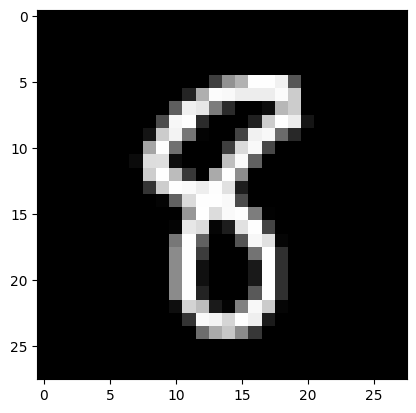

Prediction:  [6]
Label:  6


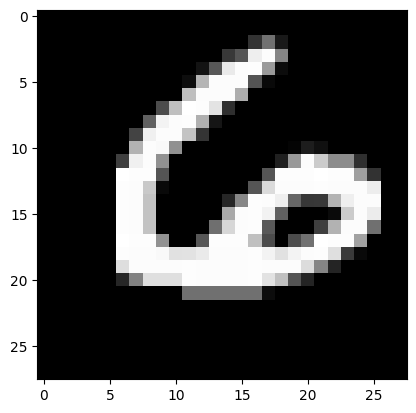

In [30]:
test_prediction(50, W1, b1, W2, b2)
test_prediction(21, W1, b1, W2, b2)
test_prediction(87, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)

In [31]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 9 1 2 4 7 1 7 6 6 7 5 7 7 1 3 9 8 2 1 2 8 8 6 0 9 7 8 0 7 2 4 2 2 0 9 2
 3 7 9 7 0 5 1 9 0 8 1 1 0 1 6 7 3 9 5 7 8 3 9 6 1 1 6 7 1 8 2 4 9 9 7 7 4
 6 6 6 8 9 2 8 1 6 9 6 9 8 4 2 1 3 7 6 2 9 5 1 6 4 7 4 2 2 0 1 1 6 0 0 7 8
 9 3 6 4 0 6 9 2 0 1 8 6 1 1 3 7 3 3 4 1 9 9 2 2 9 8 4 8 8 6 1 3 8 2 1 7 3
 5 7 4 3 6 9 4 6 0 9 8 3 7 3 0 7 3 1 3 5 0 7 1 1 3 7 4 2 7 0 6 8 4 2 9 6 9
 7 5 5 2 4 6 5 5 7 0 8 8 6 2 5 8 6 6 0 5 6 8 6 7 6 3 9 7 2 3 8 9 7 9 0 3 7
 6 6 3 3 3 0 2 4 1 4 9 2 3 7 0 3 2 0 5 7 7 1 4 3 8 0 8 9 1 1 2 8 2 9 3 0 7
 8 8 5 5 3 6 3 8 2 7 6 8 3 3 3 1 9 8 7 8 1 9 5 1 1 7 8 9 8 8 9 9 2 6 6 5 3
 4 1 3 5 9 4 5 8 6 9 3 5 3 1 2 3 8 8 1 1 7 7 4 2 8 9 3 6 0 3 7 0 1 2 8 4 3
 6 5 1 2 3 3 1 1 5 6 9 1 1 7 0 8 6 7 7 3 9 1 7 1 4 1 8 9 5 5 5 2 4 8 7 1 5
 8 4 7 1 0 1 1 4 4 2 1 9 0 7 8 1 4 5 4 5 2 8 6 5 4 3 9 3 8 2 5 9 1 3 4 2 2
 3 4 0 9 0 0 6 9 3 3 7 8 6 7 3 1 2 3 8 5 9 1 1 0 1 9 3 5 0 7 7 3 2 2 6 8 7
 6 5 4 4 6 4 3 3 6 5 1 3 1 7 5 5 1 7 6 4 5 9 7 0 5 5 7 7 2 6 3 3 3 6 0 4 4
 5 2 8 8 5 1 1 8 7 4 0 3 

np.float64(0.864)